In [1]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

sns.set(style="darkgrid")

# Signal Model

# Methods


## description

# Experiements

## Noise
The stationary noise PSD matrix is estimated
using an ideal voice activity detector,

# Load results

## synth results

In [2]:
path_to_data = '../recipes/echo_aware_processing/data/interim/'
files = glob(path_to_data + '*.csv')
results = pd.DataFrame()
for file in files:
    res = pd.read_csv(file)
    results = results.append(res)
    print(file)

../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-3_data-real_dataset-0.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-0_data-synt_dataset-0.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-1_data-real_dataset-3.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-0_data-synt_dataset-2.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-1_data-synt_dataset-5.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-0_data-real_dataset-0.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-2_data-synt_dataset-1.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-3_data-real_dataset-3.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-2_data-synt_dataset-3.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-1_data-synt_dataset-0.csv
../recipes/echo_aware_processing/data/interim/2020

In [3]:
results

,Unnamed: 0,data,array,dataset,target_idx,interf_idx,sir,snr,spk_comb,bf,sar_out,sir_in,snr_in,sdr_in,sir_out,snr_out,sdr_out,pesq_in,pesq_out
0,0,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,dpDS,0.950520,2.676881,0.015687,-1.864098,6.268219,1.774523,0.441358,1.265489,1.769791
1,1,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,rtfMVDR,4.551803,2.676881,0.015687,-1.864098,0.710932,14.330222,0.526870,1.265489,1.349328
2,2,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,ecoMVDR,-10.049626,2.676881,0.015687,-1.864098,1.414174,29.052652,1.406555,1.265489,1.261215
3,3,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,rtfLCMV,4.062314,2.676881,0.015687,-1.864098,8.334117,10.490666,6.257806,1.265489,2.071184
4,4,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,ecoLCMV,-8.314503,2.676881,0.015687,-1.864098,3.315577,25.541475,3.289387,1.265489,2.030528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,3225,synt,3.0,3.0,3.0,2.0,20.0,20.0,5.0,dpDS,-1.373558,22.721704,20.015687,18.152572,25.005486,24.955231,21.976587,2.528711,2.688821
3226,3226,synt,3.0,3.0,3.0,2.0,20.0,20.0,5.0,rtfMVDR,3.618394,22.721704,20.015687,18.152572,39.175935,28.317072,27.981355,2.528711,3.126581
3227,3227,synt,3.0,3.0,3.0,2.0,20.0,20.0,5.0,ecoMVDR,5.154276,22.721704,20.015687,18.152572,38.755770,29.905352,29.372577,2.528711,3.308191
3228,3228,synt,3.0,3.0,3.0,2.0,20.0,20.0,5.0,rtfLCMV,4.072818,22.721704,20.015687,18.152572,37.165302,27.910638,27.426761,2.528711,3.041177


# Global metrics vs bf

In [5]:
df = results.copy()
print('Check dimension')
print(len(df.loc[(df['bf']=='dpDS') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='dpDS') & (df['data']=='synt')]))
print(len(df.loc[(df['bf']=='rtfMVDR') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='rtfMVDR') & (df['data']=='synt')]))
print(len(df.loc[(df['bf']=='rtfLCMV') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='rtfLCMV') & (df['data']=='synt')]))
print(len(df.loc[(df['bf']=='ecoMVDR') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='ecoMVDR') & (df['data']=='synt')]))
print(len(df.loc[(df['bf']=='ecoLCMV') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='ecoLCMV') & (df['data']=='synt')]))

Check dimension
19427
19427
19427
19427
19427
19427
19427
19427
19427
19427


## Incemental metrics vs bf

Given the following signal model
$$ \mathbf{c}(f) = [ h_1(f), h_2{f}, \dots, h_I(f) ] s(f)$$
and let assume 1 to be the reference microphones,

We consider the following metris

$$ \mathtt{SNR}_\text{input} = 10 \log_{10} \frac{\mathbb{E}[(h_1 s)^2]}{\sigma^2_{n_1}} $$
$$ \mathtt{SIR}_\text{input} = 10 \log_{10} \frac{\sigma^2_{c_1}}{\sigma^2_{n_1}} $$

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

$\mathtt{MVDR}_{\mathtt{rtf}}$_real v.s. $\mathtt{MVDR}_{\mathtt{rtf}}$_synt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=1.044e+07
$\mathtt{DS}$_real v.s. $\mathtt{DS}$_synt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=1.403e+06
$\mathtt{MVDR}_{\mathtt{echo}}$_real v.s. $\mathtt{MVDR}_{\mathtt{echo}}$_synt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=9.700e+06
$\mathtt{LCMV}_{\mathtt{rtf}}$_real v.s. $\mathtt{LCMV}_{\mathtt{rtf}}$_synt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=9.975e+06
$\mathtt{LCMV}_{\mathtt{echo}}$_real v.s. $\mathtt{LCMV}_{\mathtt{echo}}$_synt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_s

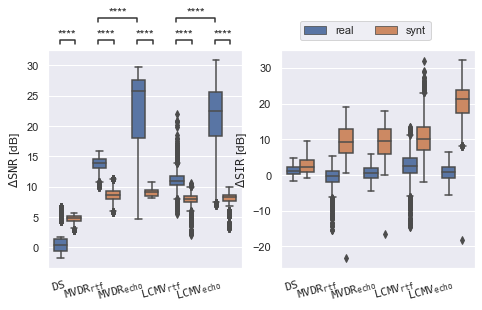

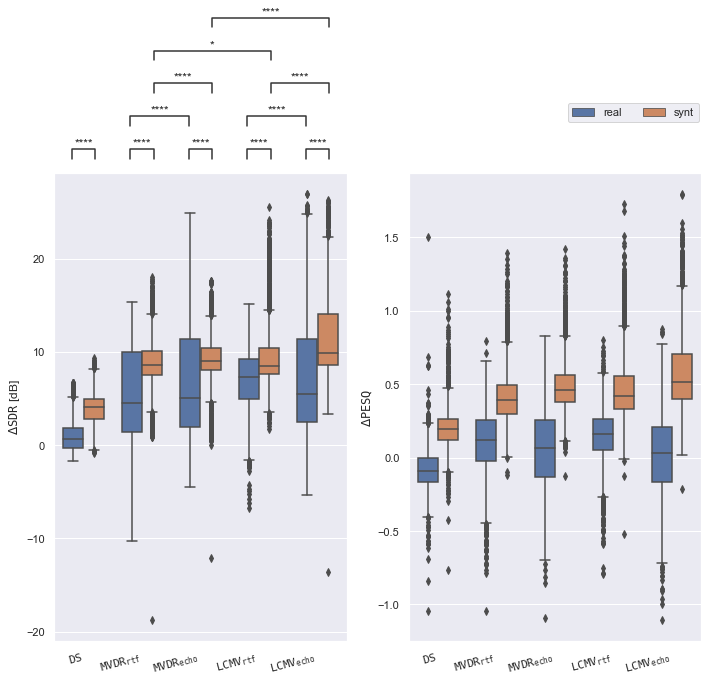

In [8]:
loc_res = results.copy()
loc_res = loc_res.loc[loc_res['dataset'] == 3]
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
loc_res['sdr_inc'] = loc_res['sdr_out'] - loc_res['sdr_in']

# beautiful plot
name = {
    'dpDS'    : '$\mathtt{DS}$',
    'rtfMVDR' : '$\mathtt{MVDR}_{\mathtt{rtf}}$',
    'rtfLCMV' : '$\mathtt{LCMV}_{\mathtt{rtf}}$',
    'ecoMVDR' : '$\mathtt{MVDR}_{\mathtt{echo}}$',
    'ecoLCMV' : '$\mathtt{LCMV}_{\mathtt{echo}}$',
}
test = ['t-test_welch', 'Wilcoxon', 'Mann-Whitney'][2]

width = 0.7
angle = 15
loc_res = loc_res.replace('dpDS',    value=name['dpDS'])
loc_res = loc_res.replace('rtfMVDR', value=name['rtfMVDR'])
loc_res = loc_res.replace('rtfLCMV', value=name['rtfLCMV'])
loc_res = loc_res.replace('ecoMVDR', value=name['ecoMVDR'])
loc_res = loc_res.replace('ecoLCMV', value=name['ecoLCMV'])

# plot
plt.figure(figsize=(16,4))
plt.subplot(141)
x = 'bf'
y = 'snr_inc'
hue = 'data'
g1 = sns.boxplot(x=x, y=y, hue=hue, data=loc_res, width=width)
order = g1.get_xticklabels()
box_pairs=[
    ((name['dpDS'], "real"),    (name['dpDS'], "synt")),
    ((name['rtfMVDR'], "real"), (name['rtfMVDR'], "synt")),
    ((name['rtfLCMV'], "real"), (name['rtfLCMV'], "synt")),
    ((name['ecoMVDR'], "real"), (name['ecoMVDR'], "synt")),
    ((name['ecoLCMV'], "real"), (name['ecoLCMV'], "synt")),
    ((name['rtfMVDR'], "real"), (name['ecoMVDR'], "real")),
    ((name['rtfLCMV'], "real"), (name['ecoLCMV'], "real")),
    ]
add_stat_annotation(g1, data=loc_res, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test=test, loc='outside', verbose=2)
g1.set_xticklabels(g1.get_xticklabels(), rotation=angle, horizontalalignment='right')
g1.legend_.remove()
g1.set(ylabel=r'$\Delta\mathtt{SNR}$ [dB]', xlabel='')

plt.subplot(142)
g2 = sns.boxplot(x='bf', y="sir_inc", hue='data', data=loc_res, width=width)
g2.set_xticklabels(g2.get_xticklabels(), rotation=angle, horizontalalignment='right')
g2.legend_.remove()
g2.legend(bbox_to_anchor=(0.3, 0.66, 0.5, 0.5), loc=1, ncol=2)
g2.set(ylabel=r'$\Delta\mathtt{SIR}$ [dB]', xlabel='')


plt.figure(figsize=(10,10))
plt.subplot(121)
x = 'bf'
y = 'sdr_inc'
hue = 'data'
g4 = sns.boxplot(x=x, y=y, hue=hue, data=loc_res, width=width)
order = g4.get_xticklabels()
box_pairs=[
    ((name['dpDS'], "real"),    (name['dpDS'], "synt")),
    ((name['rtfMVDR'], "real"), (name['rtfMVDR'], "synt")),
    ((name['rtfLCMV'], "real"), (name['rtfLCMV'], "synt")),
    ((name['ecoMVDR'], "real"), (name['ecoMVDR'], "synt")),
    ((name['ecoLCMV'], "real"), (name['ecoLCMV'], "synt")),
    ((name['rtfMVDR'], "real"), (name['ecoMVDR'], "real")),
    ((name['rtfLCMV'], "real"), (name['ecoLCMV'], "real")),
    ((name['rtfMVDR'], "synt"), (name['ecoMVDR'], "synt")),
    ((name['rtfLCMV'], "synt"), (name['ecoLCMV'], "synt")),
    ((name['rtfMVDR'], "synt"), (name['rtfLCMV'], "synt")),
    ((name['ecoMVDR'], "synt"), (name['ecoLCMV'], "synt")),
    ]
add_stat_annotation(g4, data=loc_res, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test=test, loc='outside', verbose=2)
g4.set_xticklabels(g4.get_xticklabels(), rotation=angle, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'$\Delta\mathtt{SDR}$ [dB]', xlabel='')

plt.subplot(122)
g3 = sns.boxplot(x='bf', y="pesq_inc", hue='data', data=loc_res, width=width)
g3.set_xticklabels(g3.get_xticklabels(), rotation=angle, horizontalalignment='right')
g3.legend_.remove()
g3.legend(bbox_to_anchor=(0.51, 0.66, 0.5, 0.5), loc=1, ncol=2)
g3.set(ylabel=r'$\Delta\mathtt{PESQ}$', xlabel='')
plt.tight_layout()
plt.savefig('../recipes/echo_aware_processing/pesq_results_boxplot.pdf', dpi=300)
plt.show()

# Performance vs Dataset (~ RT60)

In [ ]:
# filter
loc_res_synt = results_synt.copy()
loc_res_real = results_real.copy()
loc_ress = [loc_res_synt, loc_res_real]
# plot
for loc_res in loc_ress:

    loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
    loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
    loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
    # plot
    varx = 'dataset'
    varh = 'bf'
    plt.figure(figsize=(21,6))
    plt.subplot(131)
    sns.boxplot(x=varx, y="sir_inc", hue=varh,
                data=loc_res)
    plt.subplot(132)
    sns.boxplot(x=varx, y="snr_inc", hue=varh,
                data=loc_res)
    plt.subplot(133)
    sns.boxplot(x=varx, y="pesq_inc", hue=varh,
                data=loc_res)
    plt.show()

# Performance vs Geomtery (~ DDR)

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'sir_inc')

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'snr_inc')

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'array'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'target_idx'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

In [ ]:
res